In [2]:
import json
from os import walk
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from operator import itemgetter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# label

In [3]:
def find_label_list(label_path):
    label_list = []
    action_list = []
    for (dirpath, dirnames, filenames) in walk(label_path):
        # print(dirpath)
        label_list.append((dirpath, dirnames, filenames))
        if filenames == []:
            action_list = dirnames
            # print(dirnames)
    label_list= [[i[0], i[2]] for i in label_list if i[1]==[]]

    clip_list = []
    for action, clips in label_list:
        clip_label = [action + "\\" + clip for clip in clips]
        clip_list.extend(clip_label)

    print("You have {} actions in {}".format(len(label_list), label_path))
    print("You have {} clips in {}".format(len(clip_list), label_path))

    return label_list, clip_list, action_list

In [4]:
label_path= r"E:\k-ompanion_data\aihub\Training\label"
label_list, clip_list, action_list = find_label_list(label_path)

You have 13 actions in E:\k-ompanion_data\aihub\Training\label
You have 39537 clips in E:\k-ompanion_data\aihub\Training\label


In [5]:
a_label = clip_list[0]
print(a_label)
with open(a_label, "r", encoding="utf8") as f:
    json_object = json.load(f)

E:\k-ompanion_data\aihub\Training\label\BODYLOWER\20201022_dog-bodylower-000028.mp4.json


In [6]:
len(json_object)

3

In [7]:
json_object.keys()

dict_keys(['file_video', 'metadata', 'annotations'])

In [8]:
file_video = json_object["file_video"]
metadata = json_object["metadata"]
annotations = json_object["annotations"]

In [9]:
print(file_video)

20201022/dog-bodylower-000028.mp4


In [10]:
metadata.keys()

dict_keys(['seq', 'species', 'action', 'location', 'height', 'width', 'duration', 'animal', 'owner', 'inspect'])

In [13]:
metadata

{'seq': 28,
 'species': 'DOG',
 'action': '엎드리기(몸체를 낮게 유지)',
 'location': '실내',
 'height': 1280,
 'width': 720,
 'duration': 18.738005,
 'animal': {'breed': '포메라니안', 'gender': 'MALE', 'age': 3, 'neuter': 'Y'},
 'owner': {'pain': 'N',
  'disease': 'N',
  'emotion': '행복/즐거움',
  'situation': '먹을것, 장난감이 앞에 있을 때',
  'animalCount': 2},
 'inspect': {'action': '엎드리기(몸체를 낮게 유지)',
  'painDisease': 'N',
  'abnormalAction': 'N',
  'emotion': '편안/안정'}}

In [14]:
metadata["owner"]

{'pain': 'N',
 'disease': 'N',
 'emotion': '행복/즐거움',
 'situation': '먹을것, 장난감이 앞에 있을 때',
 'animalCount': 2}

In [15]:
metadata["inspect"]

{'action': '엎드리기(몸체를 낮게 유지)',
 'painDisease': 'N',
 'abnormalAction': 'N',
 'emotion': '편안/안정'}

In [16]:
emotion = metadata["inspect"]["emotion"]
# if metadata["inspect"]["emotion"] != metadata["owner"]["emotion"]
action = metadata["inspect"]["action"] # or from file_name

In [17]:
print(emotion, action)

편안/안정 엎드리기(몸체를 낮게 유지)


In [18]:
type(annotations)

list

In [19]:
len(annotations)

94

In [20]:
annotations[0]

{'frame_number': 0,
 'frame_url': 'https://dashboard.datamaker.io/media/task/raw_data/7e7720bf-c933-49c5-b434-e441a54341e9.jpg',
 'timestamp': 0,
 'keypoints': {'1': {'x': 326, 'y': 583},
  '2': {'x': 337, 'y': 498},
  '3': {'x': 356, 'y': 614},
  '4': {'x': 329, 'y': 618},
  '5': None,
  '6': {'x': 222, 'y': 675},
  '7': {'x': 432, 'y': 680},
  '8': {'x': 224, 'y': 772},
  '9': {'x': 390, 'y': 775},
  '10': None,
  '11': None,
  '12': None,
  '13': None,
  '14': None,
  '15': None},
 'bounding_box': {'x': 145, 'y': 377, 'width': 395, 'height': 475}}

In [21]:
annotations[0].keys()

dict_keys(['frame_number', 'frame_url', 'timestamp', 'keypoints', 'bounding_box'])

In [22]:
# information needed
data_list = []
for i in range(len(annotations)):
    frame_number = annotations[i]["frame_number"]
    timestamp = annotations[i]["timestamp"]
    bounding_box = annotations[i]["bounding_box"]
    data_list.append((frame_number, timestamp, bounding_box))

In [23]:
data_list[:10]

[(0, 0, {'x': 145, 'y': 377, 'width': 395, 'height': 475}),
 (6, 200, {'x': 154, 'y': 383, 'width': 386, 'height': 465}),
 (12, 400, {'x': 154, 'y': 383, 'width': 386, 'height': 465}),
 (18, 600, {'x': 154, 'y': 393, 'width': 386, 'height': 460}),
 (24, 800, {'x': 153, 'y': 401, 'width': 387, 'height': 463}),
 (30, 1000, {'x': 153, 'y': 401, 'width': 387, 'height': 463}),
 (36, 1200, {'x': 150, 'y': 399, 'width': 387, 'height': 463}),
 (42, 1400, {'x': 150, 'y': 399, 'width': 387, 'height': 463}),
 (48, 1600, {'x': 150, 'y': 399, 'width': 387, 'height': 463}),
 (54, 1800, {'x': 150, 'y': 399, 'width': 387, 'height': 463})]

In [24]:
len(data_list)

94

# image

In [25]:
def find_image_list(image_path):
    image_list = []
    clip_list = []
    action_list = []
    for (dirpath, dirnames, filenames) in walk(image_path):
        if dirnames == []:
            clip_list.append(dirpath)
        elif filenames == [] and dirpath.split("\\")[-1]=='image':
            action_list.extend(dirnames)
    for clip in clip_list:
        for (dirpath, dirnames, filenames) in walk(clip):
            for image in filenames:
                image_list.append(dirpath+"\\"+image)

    print("You have {} actions in {}".format(len(action_list), image_path))
    print("You have {} clips in {}".format(len(clip_list), image_path))
    print("You have {} images in {}".format(len(image_list), image_path))

    return image_list, clip_list, action_list

In [26]:
image_path= r"E:\k-ompanion_data\aihub\Training\image"
image_list, clip_list, action_list = find_image_list(image_path)

You have 13 actions in E:\k-ompanion_data\aihub\Training\image
You have 39537 clips in E:\k-ompanion_data\aihub\Training\image
You have 529591 images in E:\k-ompanion_data\aihub\Training\image


In [27]:
clip_list[0]

'E:\\k-ompanion_data\\aihub\\Training\\image\\BODYLOWER\\20201022_dog-bodylower-000028.mp4'

In [28]:
image_list[0]

'E:\\k-ompanion_data\\aihub\\Training\\image\\BODYLOWER\\20201022_dog-bodylower-000028.mp4\\frame_0_timestamp_0.jpg'

In [29]:
image_list[0].split("\\")

['E:',
 'k-ompanion_data',
 'aihub',
 'Training',
 'image',
 'BODYLOWER',
 '20201022_dog-bodylower-000028.mp4',
 'frame_0_timestamp_0.jpg']

In [30]:
frame_list = []
for i in image_list:
    clip = i.split("\\")[-2]
    if clip == "20201022_dog-bodylower-000028.mp4":
        frame_list.append(i)
        
print(len(frame_list))

14


In [31]:
criteria = []
for i in frame_list:
    frame_num = i.split("\\")[-1].split("_")[1]
    timestamp_num = i.split("\\")[-1].split("_")[3][:-4]
    print(frame_num, timestamp_num)
    criteria.append((frame_num, timestamp_num))

0 0
102 3400
108 3600
114 3800
120 4000
126 4200
12 400
132 4400
138 4600
144 4800
150 5000
156 5200
162 5400
168 5600


In [32]:
len(criteria)

14

In [33]:
data_list = []
data_list2 = []
for i in range(len(annotations)):
    frame_number = annotations[i]["frame_number"]
    timestamp = annotations[i]["timestamp"]
    for j in range(len(criteria)):
        img_frame = int(criteria[j][0])
        img_time = int(criteria[j][1])
        if img_frame== frame_number and img_time==timestamp:
            data_list.append((frame_number, timestamp))
            data_list2.append(annotations[i]["bounding_box"])
                    
            print(frame_number, timestamp)

0 0
12 400
102 3400
108 3600
114 3800
120 4000
126 4200
132 4400
138 4600
144 4800
150 5000
156 5200
162 5400
168 5600


In [34]:
len(data_list2)

14

In [35]:
data_list2

[{'x': 145, 'y': 377, 'width': 395, 'height': 475},
 {'x': 154, 'y': 383, 'width': 386, 'height': 465},
 {'x': 137, 'y': 394, 'width': 387, 'height': 461},
 {'x': 137, 'y': 394, 'width': 387, 'height': 467},
 {'x': 132, 'y': 394, 'width': 392, 'height': 467},
 {'x': 132, 'y': 394, 'width': 392, 'height': 467},
 {'x': 132, 'y': 394, 'width': 392, 'height': 467},
 {'x': 132, 'y': 394, 'width': 392, 'height': 459},
 {'x': 132, 'y': 394, 'width': 392, 'height': 459},
 {'x': 124, 'y': 391, 'width': 392, 'height': 465},
 {'x': 124, 'y': 391, 'width': 392, 'height': 465},
 {'x': 124, 'y': 385, 'width': 392, 'height': 471},
 {'x': 124, 'y': 385, 'width': 392, 'height': 471},
 {'x': 124, 'y': 385, 'width': 392, 'height': 471}]

Populating the interactive namespace from numpy and matplotlib


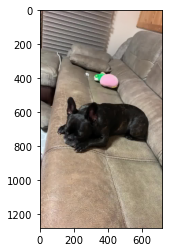

In [36]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_list[100])
imgplot = plt.imshow(img)
plt.show()